# Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio

#### As instituições financeiras no geral, possuem uma preocupação no que diz respeito à conceder crédito para seus clientes.

#### Elas precisam entender muito bem a viabilidade em conceder crédito para uma pessoa que possui determinado perfil.

#### Isso as protege de obter muitos clientes inadimplentes o que gera prejuízos para a empresa.

#### Uma das características que instiuições usam para avaliar um prospect é a renda dele. De forma simplista, uma pessoa que possui uma boa renda é menos propensa a se tornar um cliente inadimplente.

#### Tendo isso em vista, o objetivo deste estudo é prever a renda de um prospect com base em dados coletados de clientes da instiuição.

#### Está é uma das informações mais relevantes para determinar se a instituição pode conceder crédito para uma pessoa. E em casos positivos, quanto de crédito ela pode liberar.

#### Vamos analisar várias características levando em considerção as variáveis disponíveis da base de dados e por fim vamos criar um modelo que seja capaz de predizer com certa precisão, qual seria a renda deste indivíduo. 

----

## Etapa 2 Crisp-DM: Entendimento dos dados

#### Foram fornecidas 13 variáveis mais a variável resposta (em itálico na tabela). O significado de cada uma dessas variáveis se encontra na tabela.


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data em que foi feita a coleta do dado             | Data         |
| id_cliente              |  Identificação do cliente (código do cliente)       | Inteiro      |
| sexo                    |  M = 'Masculino'; F = 'Feminino'	                | M/F          |
| posse_de_veiculo        |  True = 'possui'; False = 'não possui'              |	Booleano   |
| posse_de_imovel         |  True = 'possui'; False = 'não possui'              | 	Booleano   |
| qtd_filhos              |  Quantidade de filhos do cliente                    | Inteiro      |
| tipo_renda              |  Tipo de renda (ex: assaliariado, autônomo etc)     | Object       |
| educacao                |  Nível de educação (ex: secundário, superior etc)   |  Object      |
| estado_civil            |  Estado civil (ex: solteiro, casado etc)            | Object       |
| tipo_residencia         |  tipo de residência (ex: casa/apartamento, com os pais etc) | Object|
| idade                   |  idade em anos                                      | Inteiro      |
| tempo_emprego           |  tempo de emprego em anos                           | Float      |
| qt_pessoas_residencia   |  quantidade de pessoas na residência                | Inteiro      |
| *renda*                   |  *Valor da renda em reais*                            | *Float*        |





#### Carregando os pacotes
##### Vamos carregar os pacotes necessários para realizarmos as analises e transformações em nossa base de dados

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from ydata_profiling import ProfileReport

%matplotlib inline

ModuleNotFoundError: No module named 'ydata_profiling'

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
# vamos carregar nosas base de dados e chamar esta base de 'renda'
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
# estamos usando uma biblioteca que importamos para visualizar e ter uma visão geral dos dados
profile = ProfileReport(renda)
profile


NameError: name 'ProfileReport' is not defined

In [5]:
# aqui vamos salvar um html numa pasta chamada output que ja existe no diretório raiz deste notebook
# podemos usar este html para acessar e ter  ver melhor as metricas da nossa base de dados
profile.to_file('./output/renda_analisys.html')

NameError: name 'profile' is not defined

##### Conferindo o overview geral dos dados através do método ProfileReport do pacote ydata_profiling, pudemos obter algumas informações.
##### Vamos discorrer abaixo sobre:


##### 01 - Nossa base de dados possui uma coluna que possui muitos missings. Seria nossa coluna 'tempo_emprego'

In [6]:
renda.value_counts()

Unnamed: 0  data_ref    id_cliente  sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  tipo_renda        educacao             estado_civil  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia  renda   
0           2015-01-01  15056       F     False             True             0           Empresário        Secundário           Solteiro      Casa             26     6.602740       1.0                    8060.34     1
9984        2015-10-01  5150        F     False             False            0           Assalariado       Superior incompleto  Casado        Casa             53     5.216438       2.0                    3867.80     1
9958        2015-10-01  12389       F     True              True             1           Servidor público  Secundário           Casado        Casa             46     1.115068       3.0                    900.99      1
9960        2015-10-01  3972        F     False             True             0           Assalariado       Secundário           Casad

##### Veja que temos menos dados somente na coluna tempo_emprego. Teremos que tratar este problema em breve.

##### 02 - Outro detalhe que o ProfileReport apontou é a coluna UNNAMED: 0 que está uniformemente distribuido com valores unicos em todo o daaframe. Sendo assim também teremos que decidir o que fazer com eles uma vez que eles apresentam valores idênticos aos valores dos index de cada linha.

In [7]:
renda['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
14995    14995
14996    14996
14997    14997
14998    14998
14999    14999
Name: Unnamed: 0, Length: 15000, dtype: int64

##### 03 -  Temos também a coluna tipo_residencia que segundo o relatório está com as categorias desequilibradas sendo que uma categoria específica está representando 75,1% do total de observações.

<Axes: xlabel='tipo_residencia'>

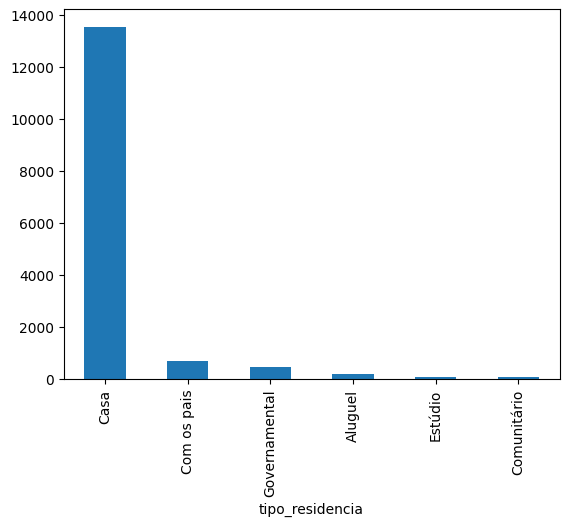

In [8]:
renda['tipo_residencia'].value_counts().plot.bar()

##### 04 - A coluna qtd_filhos que segundo o relatório obtem uma alta taxa de valores iguais a 0.

##### Manteremos desta forma acreditando que estes dados são verídicos, sendo totalmente possível esta quantidade de pessoas não terem filhos no momento da coleta destes dados.

<Axes: xlabel='qtd_filhos'>

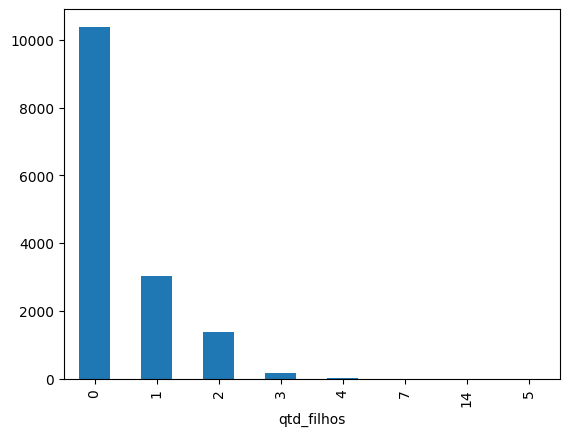

In [9]:
renda['qtd_filhos'].value_counts().plot.bar()

##### 05 - A coluna 'data_ref' também tem uma distribuição uniforme no dataframe. Acredito que não seja tão interessante para retirar algum insigth significativo.

In [10]:
renda['data_ref'].value_counts()

data_ref
2015-01-01    1000
2015-02-01    1000
2015-03-01    1000
2015-04-01    1000
2015-05-01    1000
2015-06-01    1000
2015-07-01    1000
2015-08-01    1000
2015-09-01    1000
2015-10-01    1000
2015-11-01    1000
2015-12-01    1000
2016-01-01    1000
2016-02-01    1000
2016-03-01    1000
Name: count, dtype: int64

-----

### Entendimento dos dados - Bivariadas




##### Vamos tentar entender a alteração da renda indicada pela variável resposta (renda) e as variáveis explicativas (demais). 

##### Para isto, vamos observar alguns graficos que envolvem a variável resposta (renda) com outras variáveis explicativas.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\llluc\AppData\Local\Temp\ipykernel_4636\4234152388.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  educ_x_renda = sns.catplot(x = 'educacao',
C:\ProgramData\anaconda3\Lib

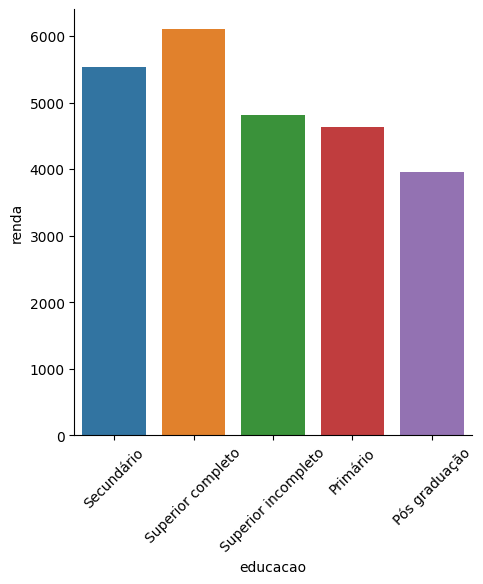

In [11]:
educ_x_renda = sns.catplot(x = 'educacao',
            y = 'renda',
            data = renda,
            kind = 'bar',
            ci = None,
           )
educ_x_renda.set_xticklabels(rotation = 45)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\llluc\AppData\Local\Temp\ipykernel_4636\848308807.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  estadocivil_x_renda = sns.catplot(x = 'estado_civil',
C:\ProgramData\ana

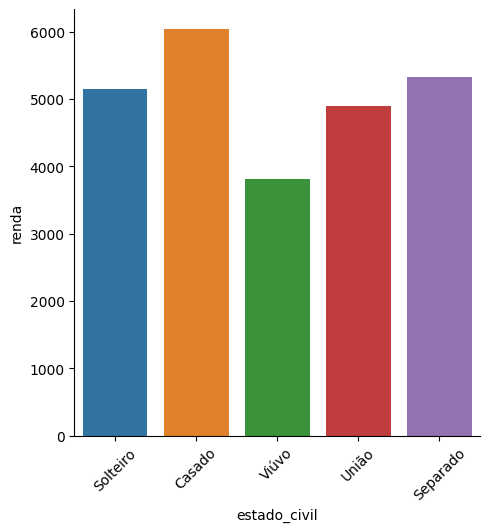

In [12]:
estadocivil_x_renda = sns.catplot(x = 'estado_civil',
            y = 'renda',
            data = renda,
            kind = 'bar',
            ci = None,
           )
estadocivil_x_renda.set_xticklabels(rotation = 45)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\llluc\AppData\Local\Temp\ipykernel_4636\212496102.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  tiporenda_x_renda = sns.catplot(x = 'tipo_renda',
C:\ProgramData\anacond

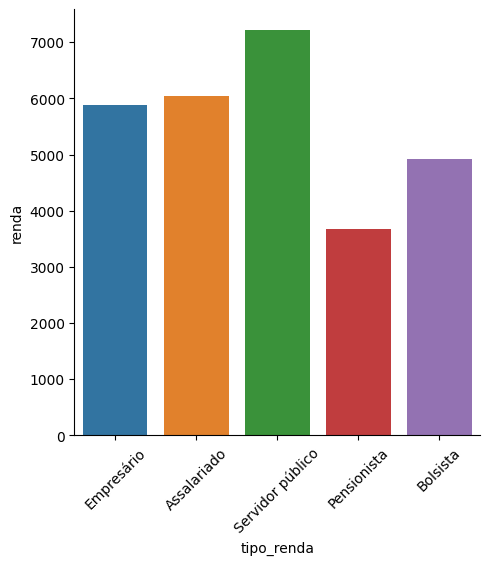

In [13]:
tiporenda_x_renda = sns.catplot(x = 'tipo_renda',
            y = 'renda',
            data = renda,
            kind = 'bar',
            ci = None,
           )
tiporenda_x_renda.set_xticklabels(rotation = 45)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\llluc\AppData\Local\Temp\ipykernel_4636\709566350.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  posseimovel_x_renda = sns.catplot(x = 'posse_de_imovel',
C:\ProgramData\

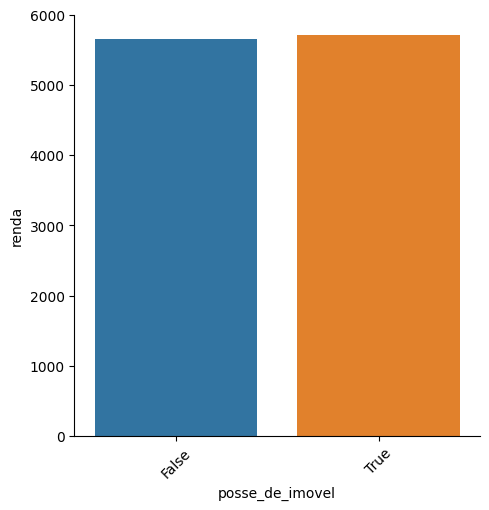

In [14]:
posseimovel_x_renda = sns.catplot(x = 'posse_de_imovel',
            y = 'renda',
            data = renda,
            kind = 'bar',
            ci = None,
           )
posseimovel_x_renda.set_xticklabels(rotation = 45)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\llluc\AppData\Local\Temp\ipykernel_4636\1497309452.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  qtdfilhos_x_renda = sns.catplot(x = 'qtd_filhos',
C:\ProgramData\anacon

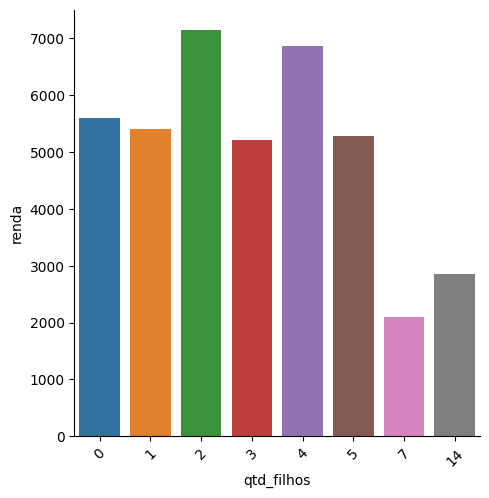

In [15]:
qtdfilhos_x_renda = sns.catplot(x = 'qtd_filhos',
            y = 'renda',
            data = renda,
            kind = 'bar',
            ci = None,
           )
qtdfilhos_x_renda.set_xticklabels(rotation = 45)

In [16]:
renda['tipo_residencia'].value_counts()


tipo_residencia
Casa             13532
Com os pais        675
Governamental      452
Aluguel            194
Estúdio             83
Comunitário         64
Name: count, dtype: int64

##### Vemos que pelas variáveis que observamos não conseguimos identificar de prontidão uma relação ou característica do indivíduo que seja capaz de explicar sua renda.

##### Os graficos estão bem distribuídos não dando indicação de nenhuma característica que possa nos ajudar a explicar a renda de um indivíduo.

##### Mais adiante será necessário um estudo mais aprofundado destes dados para conseguirmos retirar informações que podem nos levar a alguma conclusão.


-----

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa iremos realizar as seguintes operações com os dados:

 - **seleção**: Vamos selecionar os dados adequadamente.
 - **limpeza**: Iremos identificar e tratar dados faltantes
 - **construção**: Se preciso, vamos realizar a construção de novas variáveis
 - **formatação**: Manipular os dados de forma a obtermos os dados em formatos úteis/convenientes para nossa modelagem.



------

#### - selecçao

##### Vamos rever nosso dataframe e seus valores atuais

In [17]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


-----

#### - limpeza

##### Vamos nos livrar de colunas que não fazem sentido para explicarmos o fenomeno da renda.
##### Podemos abrir mão das colunas:  'Unnamed: 0', 'data_ref' e 'id_cliente'

##### A partir de então chamaremos nosso dataframe de 'df'

In [18]:
lista = ['Unnamed: 0', 'data_ref', 'id_cliente']
df = renda.drop(columns = lista)
df.head(3)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89


##### Na etapa de entendimento dos dados vimos que a coluna 'tempo_emprego' possui muitos missings.

##### Isso pode ser um grande problema para conseguirmos encontrar correlações entre as variáveis.

##### Sendo assim, podemos tomar algumas medidas para contornar tal situação:
##### 01 - Podemos preencher estes missings com o valor ZERO passando a considerarmos de que o individuo observado nunca trabalhou. Mas se ele nunca trabalhou, logo não faz sentido ele ter uma renda. Então esta saída torna-se inviável para esta situação.
##### 02 - Podemos excluir as linhas do nosso dataframe que possuem os valores 'tempo_emprego' como nulos/vazios. Uma vez que todas outras colunas possuem todas celulas preenchidas, nós teríamos um dataframe completo sem nenhum missing. Somando o fato de que não podemos saber quanto tempo de emprego tem o indivíduo observado, não podemos assumir nenhum valor plausível à ele com risco a tornar nossa analise inviesada/alterada por conta do preenchimento inadequado destes dados.

##### Por fim, decidimos então por excluir todas a linhas do nosso dataframe que possuem missings na coluna 'tempo_emprego'

In [19]:
#Vamos primeiro conferir quantas linhas o df atual possui:
df.count()

sexo                     15000
posse_de_veiculo         15000
posse_de_imovel          15000
qtd_filhos               15000
tipo_renda               15000
educacao                 15000
estado_civil             15000
tipo_residencia          15000
idade                    15000
tempo_emprego            12427
qt_pessoas_residencia    15000
renda                    15000
dtype: int64

In [20]:
# agora vamos dropar nossos missings e conferir novamente
df = df.dropna()
df.count()

sexo                     12427
posse_de_veiculo         12427
posse_de_imovel          12427
qtd_filhos               12427
tipo_renda               12427
educacao                 12427
estado_civil             12427
tipo_residencia          12427
idade                    12427
tempo_emprego            12427
qt_pessoas_residencia    12427
renda                    12427
dtype: int64

##### Percebemos que agora temos o mesmo numero de valores para todas as colunas pertinentes do nosso dataframe:
##### 12.427 observações.

------

#### - construção

##### Haja visto as variáveis que temos agora em nosso df, não faz-se necessário a criação de outra varíavel ou da importação de algum banco de dados que possa ser adicionado à base.

-----

#### - formatação

##### Nesta etapa vamos agora realizar a formatação dos dados visando prepará-los para aplicação de um modelo estatístico.
##### Uma das premissas do modelo estatistico que vamos usar é que ele precisa que todos os dados sejam numéricos.
##### Por este motivo, as variáveis do nosso dataframe que forem do tipo categórico deverão sofrer transformação para o que chamamos de variáveis dummy.

In [21]:
#vamos visualizar os tipos das variáveis que temos até o momento:
df.dtypes

sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

##### Observamos acima que temos alguns dados descritos como 'object' que o pandas entende como 'strings'.
##### Podemos deduzir como variáveis categóricas.
##### As demais já estão com formato numérico e por isso não precisarão de tratamento
##### Temos também duas colunas do tipo booleanas. Teremos também que converter os valores False e True para 0 e 1 respectivamente.

In [22]:
#criando uma lista das variáveis que precisam de ser transformadas para dummy
lista_var_categoricas = ['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'sexo']

#aplicando o metodo do pandas para as colunas da nossa lista
df_dummie = pd.get_dummies(data = df, columns = lista_var_categoricas, drop_first = True, dummy_na=False)

#criando um filtro para selecionar somente as colunas do tipo booleanas
selecao = df_dummie.columns[df_dummie.dtypes == 'bool']

#tranformando minhas colunas booleanas em 'int'
df_dummie[selecao] = df_dummie[selecao].astype(int)

#visualizando o novo dataframe
df_dummie


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,sexo_M
0,0,1,0,26,6.602740,1.0,8060.34,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,1,1,0,28,7.183562,2.0,1852.15,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,35,0.838356,2.0,2253.89,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,30,4.846575,3.0,6600.77,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,33,4.293151,1.0,6475.97,0,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1,0,0,32,9.849315,2.0,1592.57,0,1,0,...,0,0,0,0,1,0,0,0,0,1
14995,0,1,0,48,13.887671,1.0,7990.58,0,1,0,...,0,1,0,0,1,0,0,0,0,0
14997,1,1,0,45,7.832877,2.0,604.82,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14998,1,0,0,36,4.298630,2.0,3352.27,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [23]:
#conferindo os tipos do dataframe após o tratamento das variáveis
df_dummie.dtypes

posse_de_veiculo                   int32
posse_de_imovel                    int32
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
tipo_renda_Bolsista                int32
tipo_renda_Empresário              int32
tipo_renda_Pensionista             int32
tipo_renda_Servidor público        int32
educacao_Pós graduação             int32
educacao_Secundário                int32
educacao_Superior completo         int32
educacao_Superior incompleto       int32
estado_civil_Separado              int32
estado_civil_Solteiro              int32
estado_civil_União                 int32
estado_civil_Viúvo                 int32
tipo_residencia_Casa               int32
tipo_residencia_Com os pais        int32
tipo_residencia_Comunitário        int32
tipo_residencia_Estúdio            int32
tipo_residencia_Governamental      int32
sexo_M          

##### Neste momento temos o nosso dataframe pronto para iniciarmos a etapa de modelagem.

------

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


- ##### Selecionar a técnica de modelagem

Utilizaremos a técnica de floresta aleatória (Random Forest Regressor), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como esta.

- ##### Desenho do teste

Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada treinamento, onde o algoritmo 'aprende', e outra chamada teste, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo.

- ##### Avaliação do modelo

Faremos a avaliação do nosso modelo através do coeficiente de determinação (R²), avaliando a classificação do modelo e comparando com o resultado real armazenado na variável resposta.

---

In [24]:
# primeiro vamos dar um nome menor para o dataframe que preparamos para o modelo
df1 = df_dummie

In [25]:
# agora vamos separar neste dataframe o que são as variáveis explicativas (X) e o que é a variável resposta (y)

x = df1.drop('renda', axis = 1)
y = df1['renda']

In [26]:
# aqui vamos separar nossa base de dados em base de treinamento e base de testes
# determinaremos que 30% dos dados serão para teste e o restante para treinamento

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 100)

In [27]:
# agora vamos criar uma variável onde será criada a nossa Random Forest Regressor
# utilizaremos 100 árvores para este estudo

rfr = RandomForestRegressor(n_estimators = 200, random_state = 100)

In [28]:
# com a ramdom forest criada agora podemos 'fitar' (treinar) nosso modelo com os dados de treinamento antes já definidos

rfr.fit(x_treinamento, y_treinamento)

RandomForestRegressor(n_estimators=200, random_state=100)

In [29]:
# agora vamos criar uma variável que vai armazenar previsões na base de testes para o modelo treinado com a base de treinamento

previsao = rfr.predict(x_teste)

In [34]:
print(rfr)

RandomForestRegressor(n_estimators=200, random_state=100)


- ##### Vamos usar um looping para tentar encontrar algum valor de R² que seja melhor que o encontrado acima levando em consideração testes de RandomForestRegressors que usam de 1 a 100 árvores:

In [35]:
lista_r2=[]

for valor in range(1,100):
    rfr = RandomForestRegressor(n_estimators = valor, random_state = 100)
    rfr.fit(x_treinamento, y_treinamento)
    previsao = rfr.predict(x_teste)
    r2 = r2_score(y_teste, previsao)
    lista_r2.append(r2)

melhor_r2 = max(lista_r2)
melhor_numero_arvores = lista_r2.index(melhor_r2) + 1  # +1 porque a indexação começa em 0

print(f"Melhor R²: {melhor_r2}")
print(f"Número de árvores correspondentes: {melhor_numero_arvores}")

Melhor R²: 0.430308473228487
Número de árvores correspondentes: 25


##### Vemos que o melhor numero de árvores possível para este modelo usando RandomForestRegressor são 25 árvores que retornam em um R² igual a aproximadamente 0.43

---

## Etapa 5 Crisp-DM: Avaliação dos resultados


 Um valor de R² = 0.43 indica que o modelo explica aproximadamente 43% da variabilidade nos dados de teste. Isso significa que o modelo é capaz de capturar parte da relação entre as variáveis de entrada e a variável de saída. Um R² 2
  de 0.43 não é um ajuste perfeito, mas ainda indica que o modelo está fazendo alguma contribuição útil para a explicação da variabilidade nos dados. 

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Faremos a etapa de criação de uma aplicação em Streamlit que seja capaz de fazer uso deste modelo para receber os valores de cada variável e predizer a renda.

Esta aplicação está anexa aos arquivos deste projeto.M